In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns



In [2]:
import os
import pandas as pd

# Path to your dataset folder (use your actual path)
dataset_folder = r'C:\Users\USER\Desktop\datascience\youtube\dataset'

# List all CSV files in the folder
csv_files = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if f.endswith('.csv')]

#print("Files found:", csv_files)  # Optional: check which files will be loaded

# Read and concatenate all CSV files
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# print(f"Combined dataframe shape: {df.shape}")
# print(df.head())  # Preview the combined data


In [3]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Data preprocessing 
- import necessary library
- read dataset
- sanity check data
- exploratory data analysis
- misssing value treatmetns
- duplicates and garbage value treatments
- normalization
- encoding of data
- 

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830742,53,94939,4,2,188,226,47,47,47.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Sanity check of data


In [6]:
#shape
df.shape

(2830743, 79)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [8]:
# finding the missing value
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [9]:
df.isnull().sum()/df.shape[0]*100

 Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64

In [10]:
df.columns=df.columns.str.strip()

In [11]:
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [12]:
# funding the duplicates 
int(df.duplicated().sum())

308381

In [13]:
# remove exact duplicates
df=df.drop_duplicates()


In [14]:
df.shape

(2522362, 79)

In [15]:
#identifying the garbage value
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("*****"*10)
    

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64
**************************************************


## exploratory data analysis(EDA)

In [16]:
#descriptive statistics
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,...,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06,2.522362e+06
mean,8.704762e+03,1.658132e+07,1.027627e+01,1.156596e+01,6.115751e+02,1.813315e+04,2.310918e+02,1.919464e+01,6.347010e+01,7.727759e+01,...,6.005904e+00,-3.080307e+03,9.152169e+04,4.616313e+04,1.719104e+05,6.542300e+04,9.331578e+06,5.654433e+05,9.757716e+06,8.887157e+06
std,1.902507e+04,3.522426e+07,7.941738e+02,1.056594e+03,1.058499e+04,2.397434e+06,7.561625e+02,6.079447e+01,1.955015e+02,2.967953e+02,...,6.742059e+02,1.149402e+06,6.864412e+05,4.164568e+05,1.085243e+06,6.109712e+05,2.484157e+07,4.872678e+06,2.561067e+07,2.457481e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.057700e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.550000e+02,4.000000e+01,2.000000e+00,3.611111e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.329717e+06,6.000000e+00,5.000000e+00,3.320000e+02,9.880000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.413913e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [17]:
df.describe(include='object')

,Label
count,2522362
unique,15
top,BENIGN
freq,2096484


In [18]:
# # histogram to understnd the distribution of data
# import warnings 
# warnings.filterwarnings('ignore')
# for i in df.select_dtypes(include='number').columns:
#     sns.histplot(data=df,x=i)
#     plt.show()


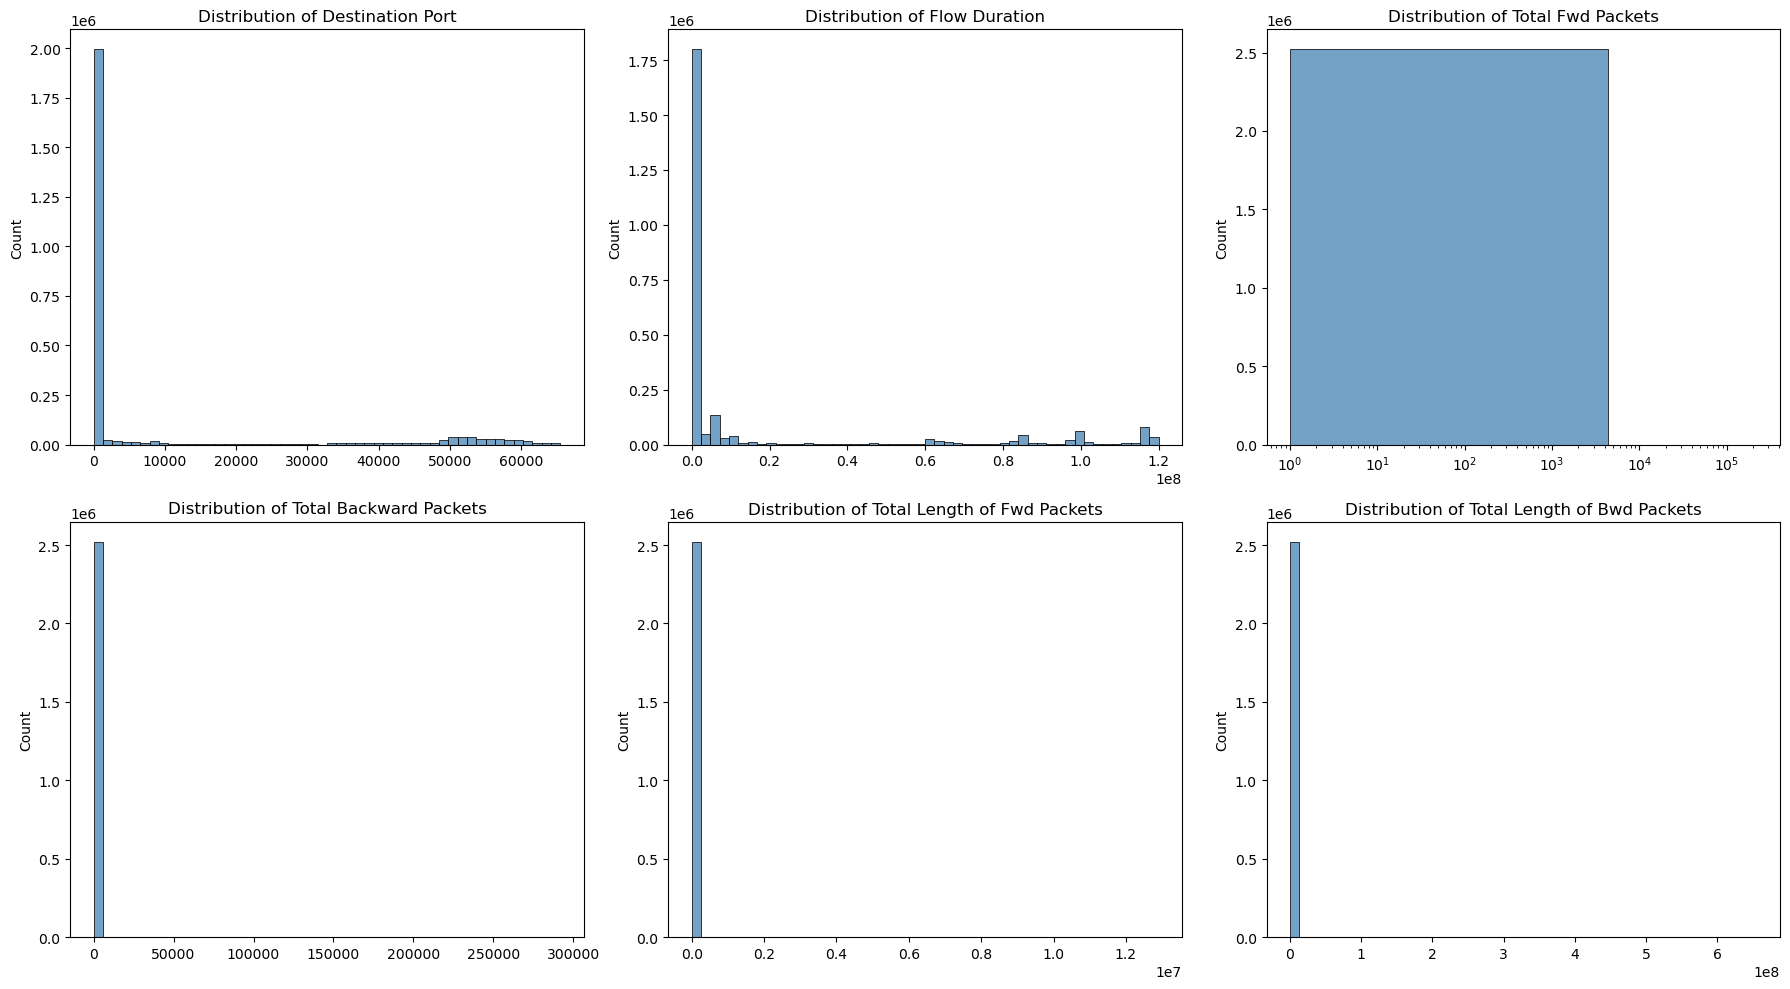

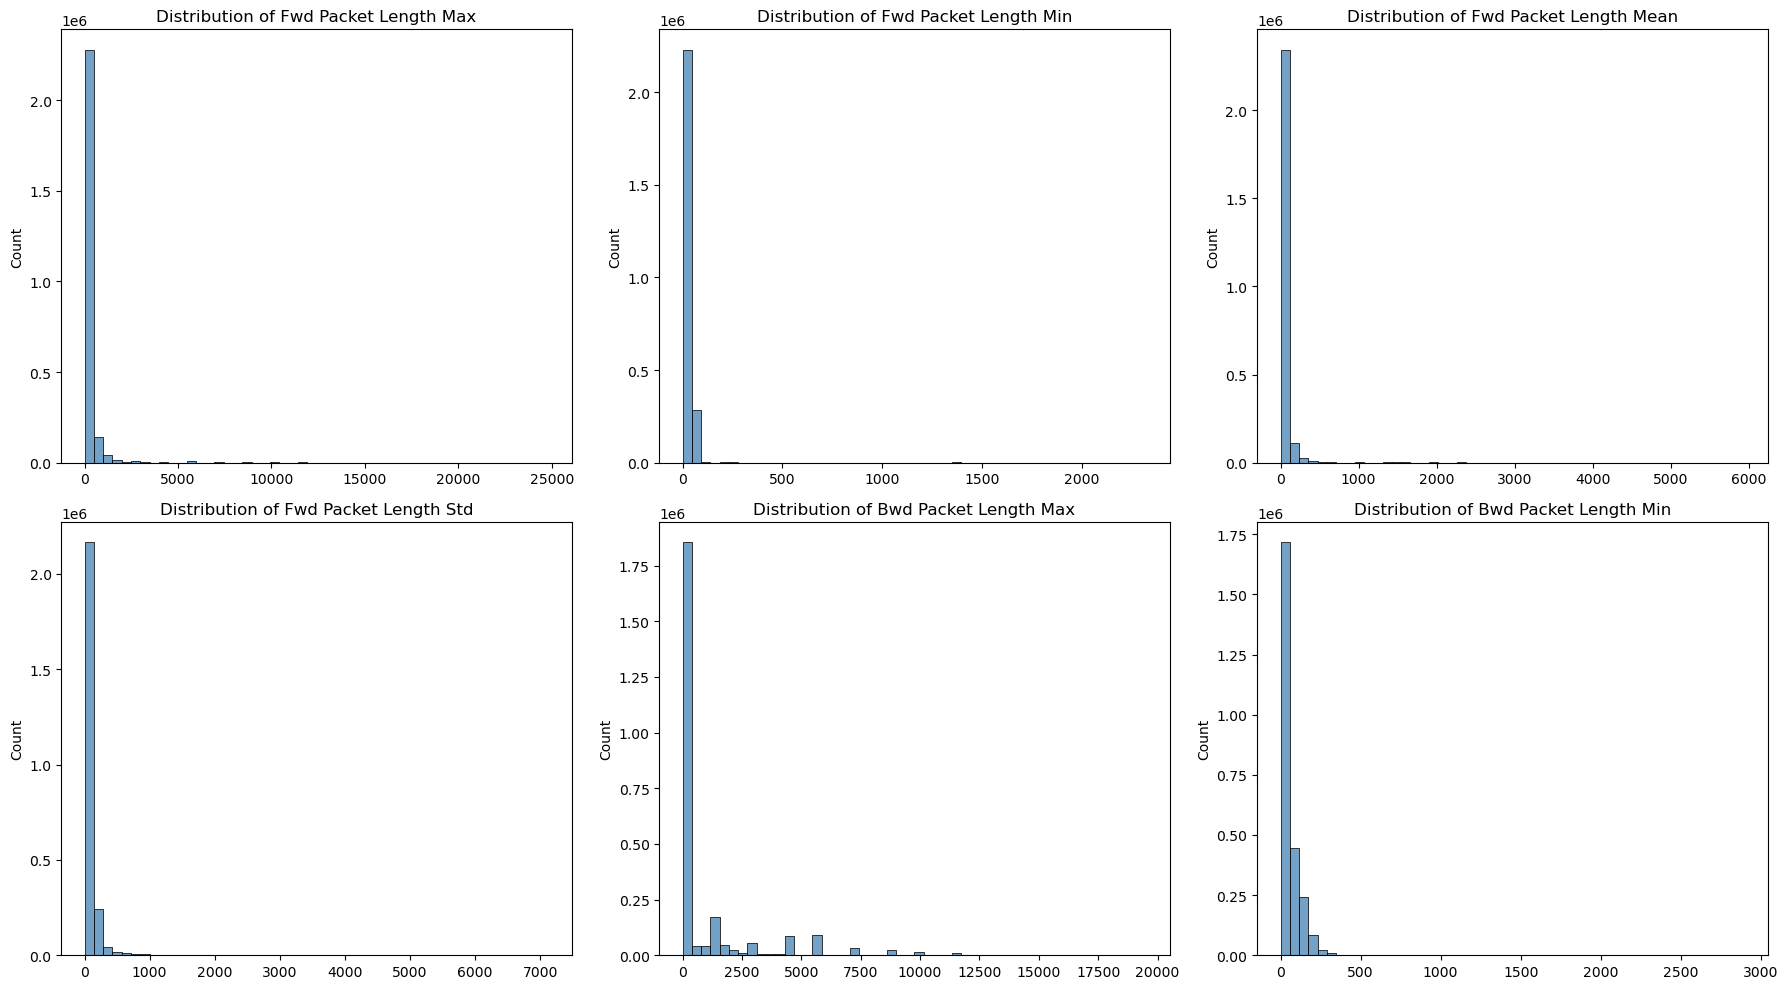

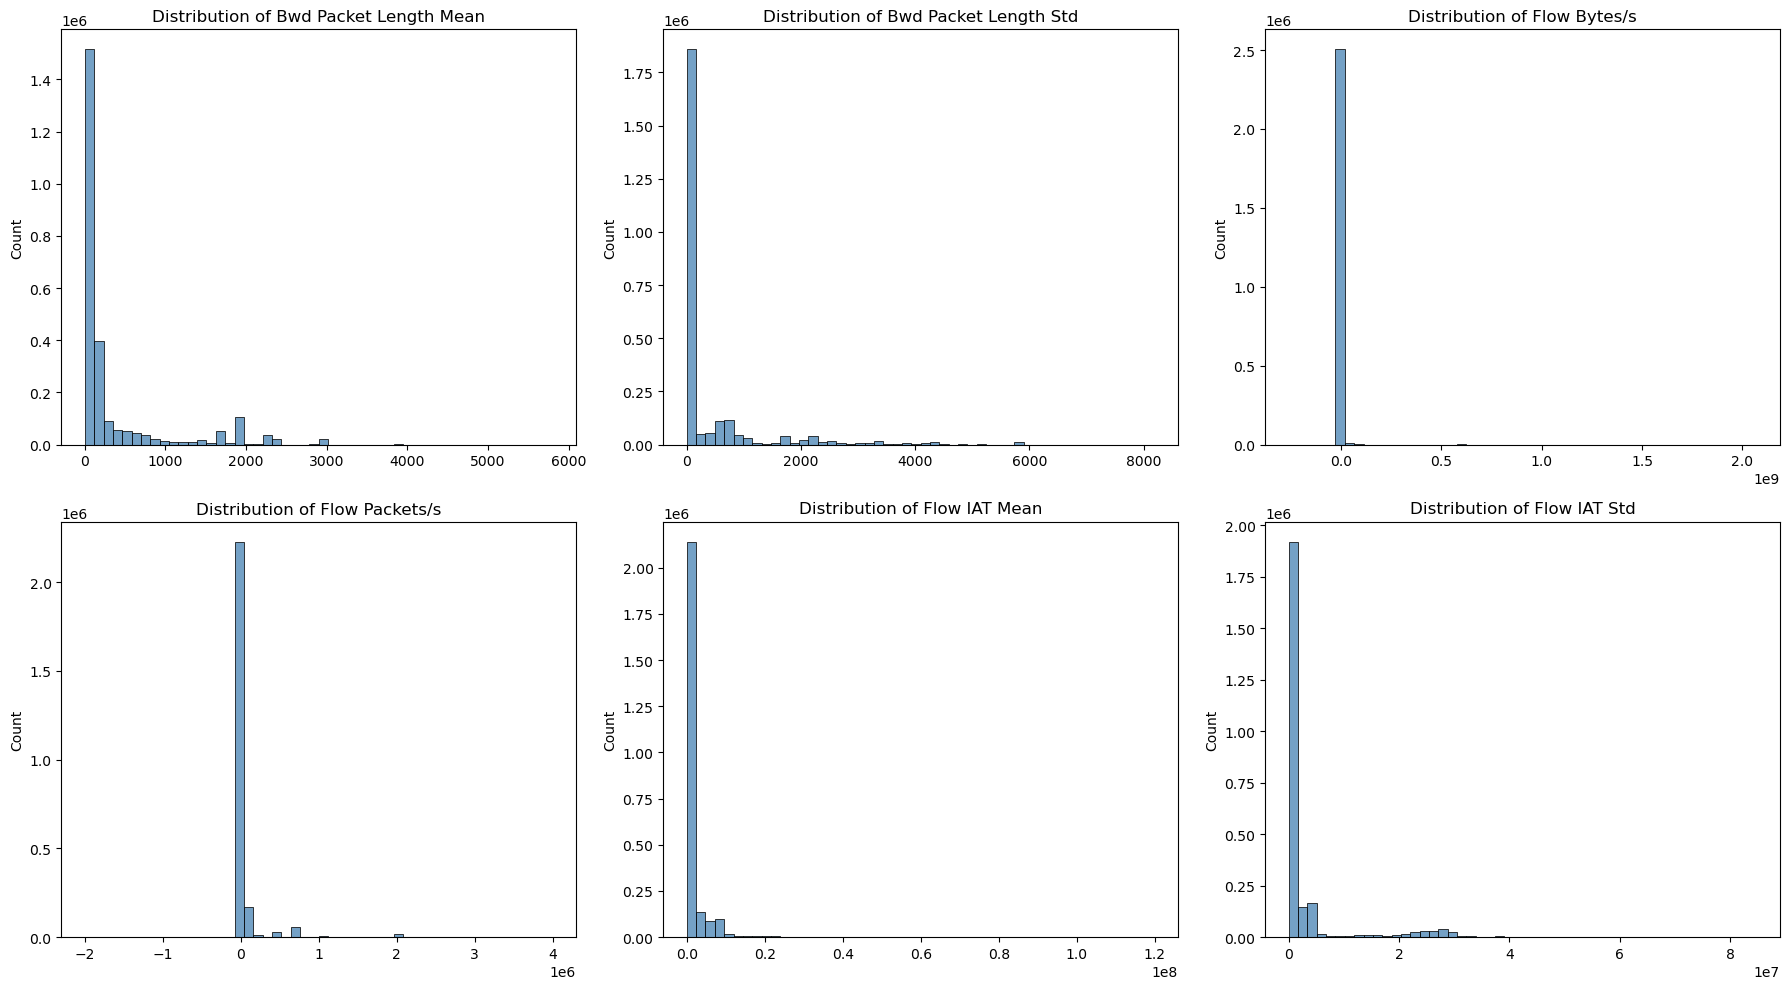

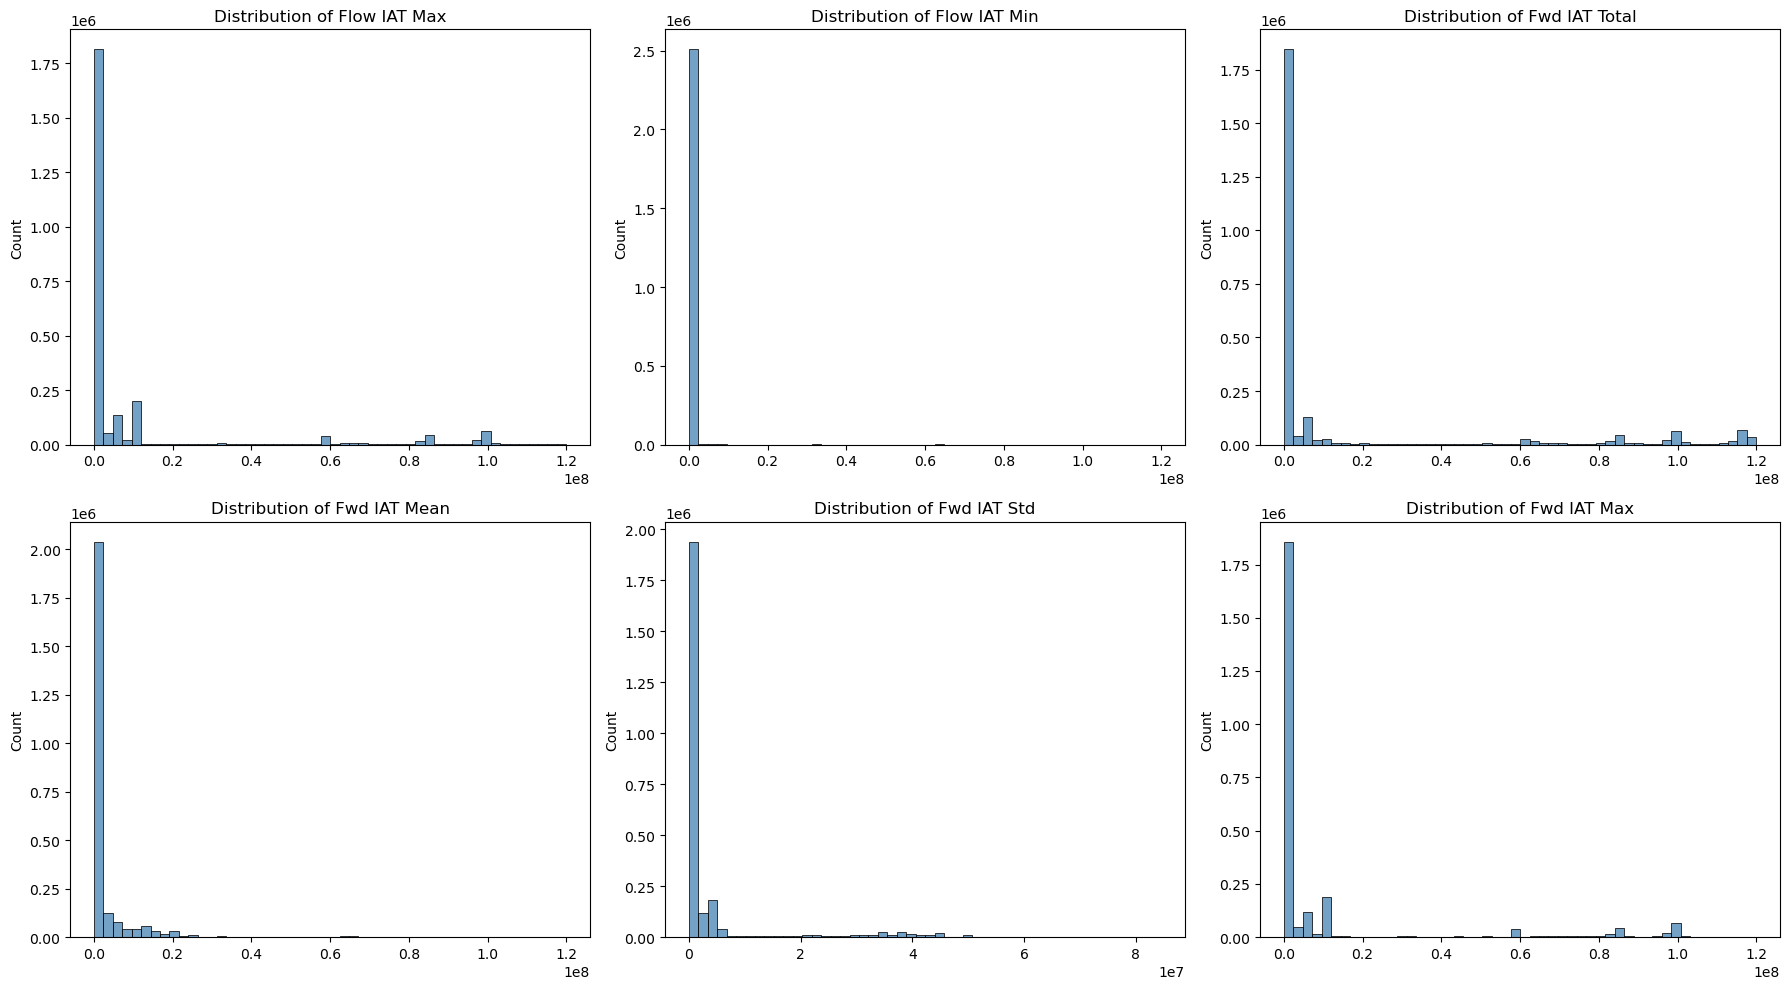

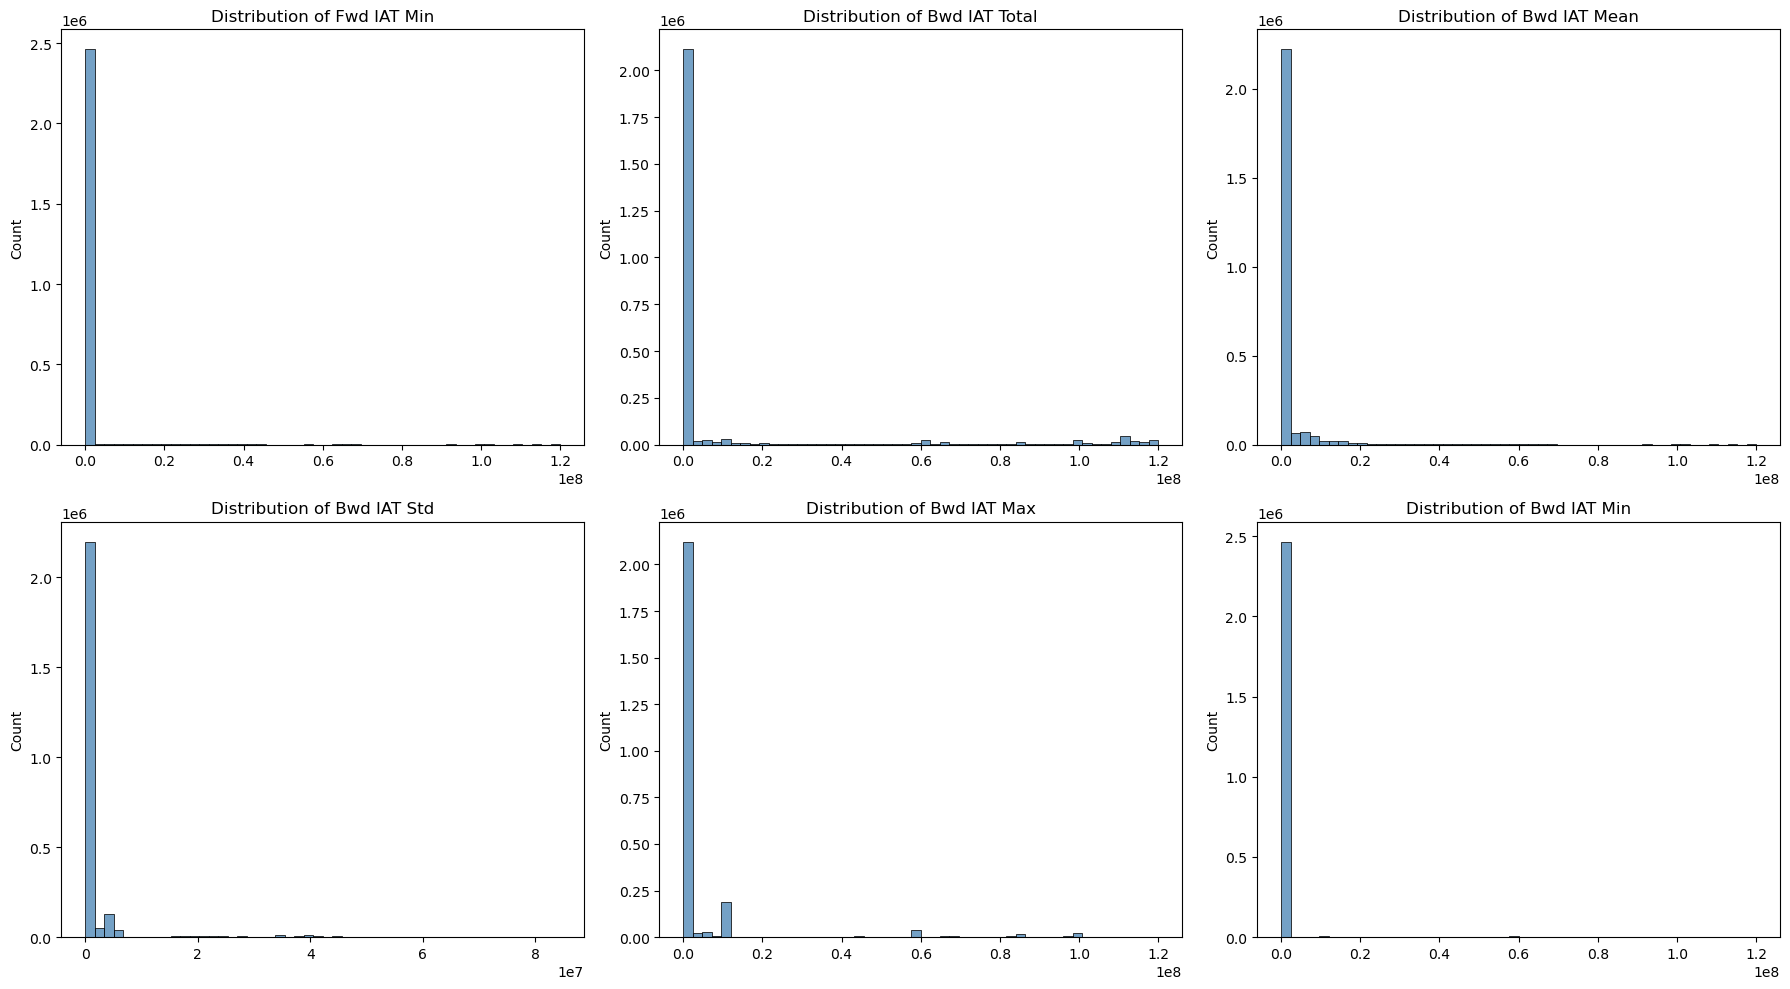

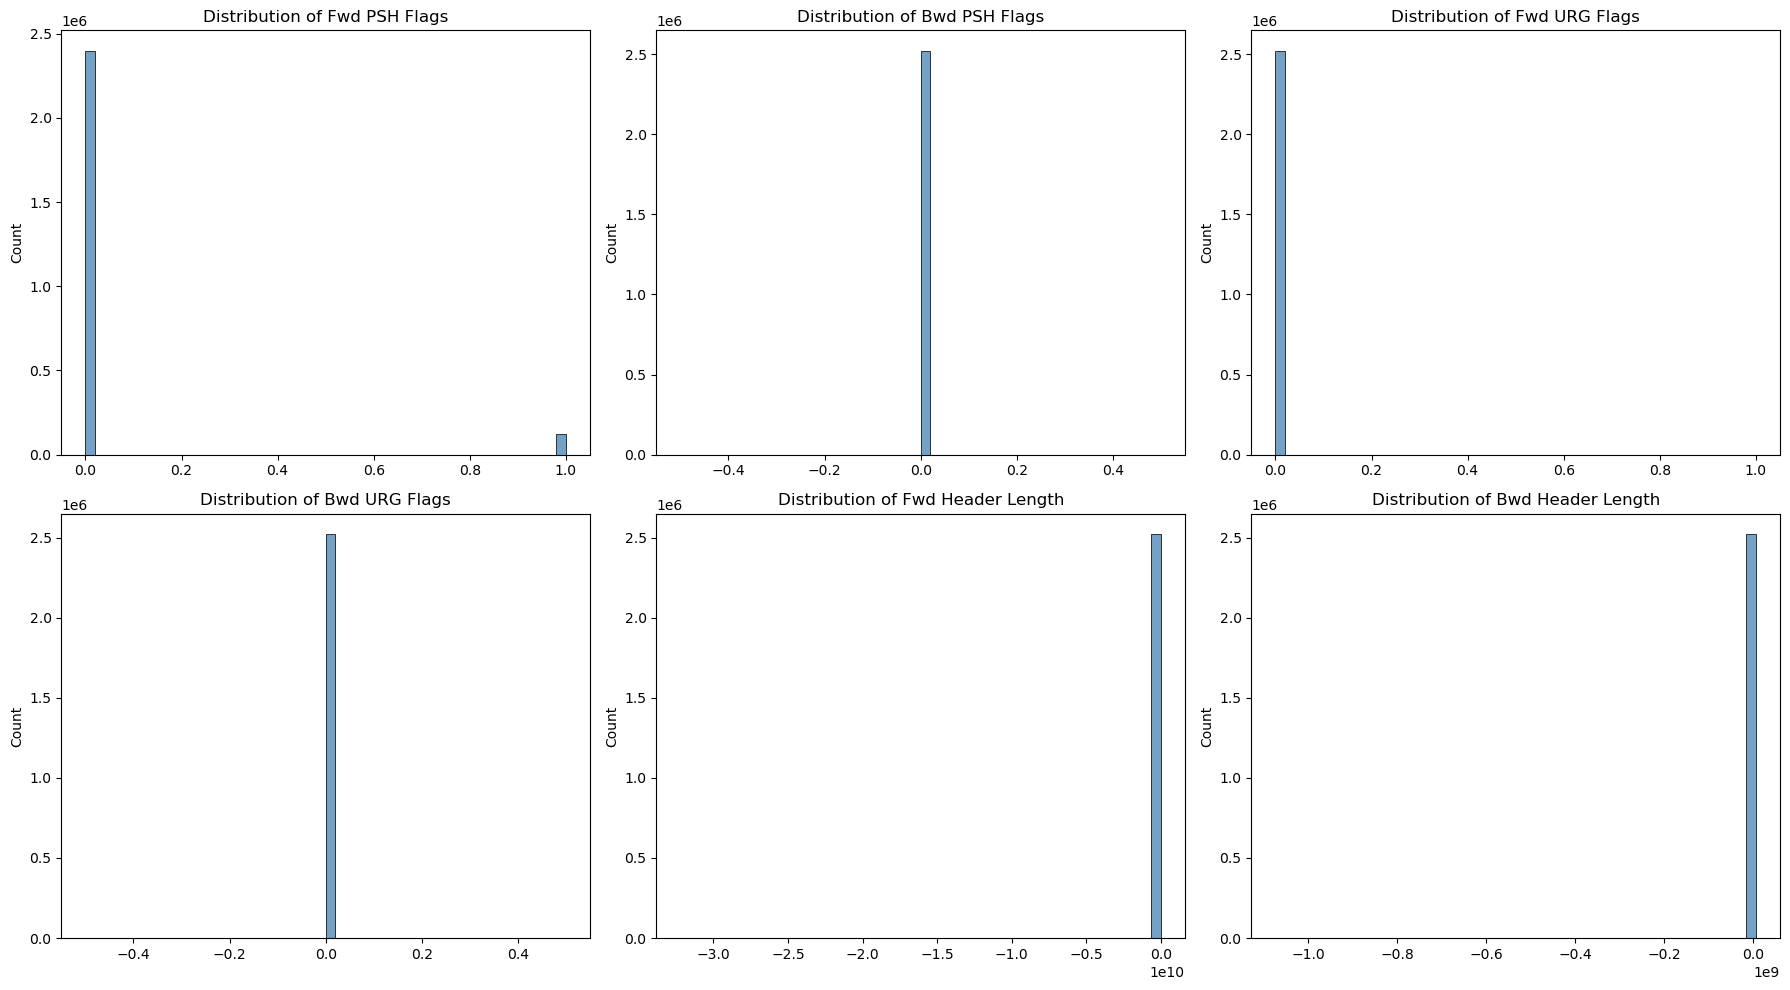

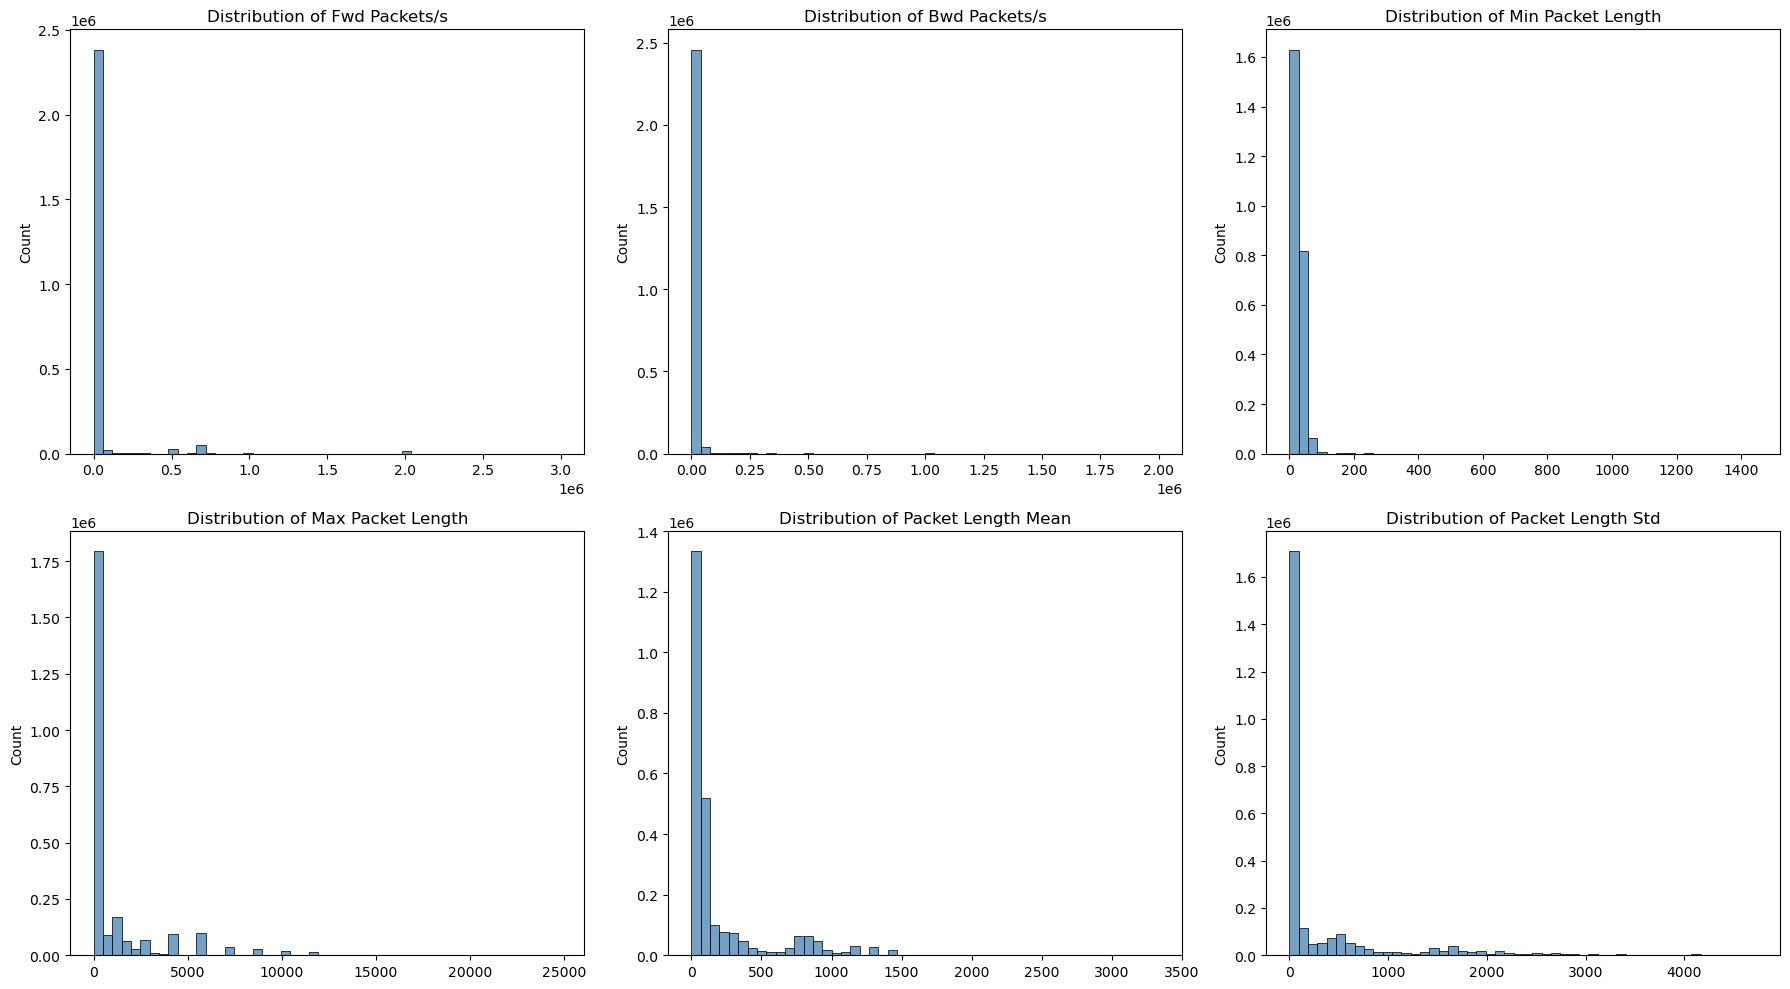

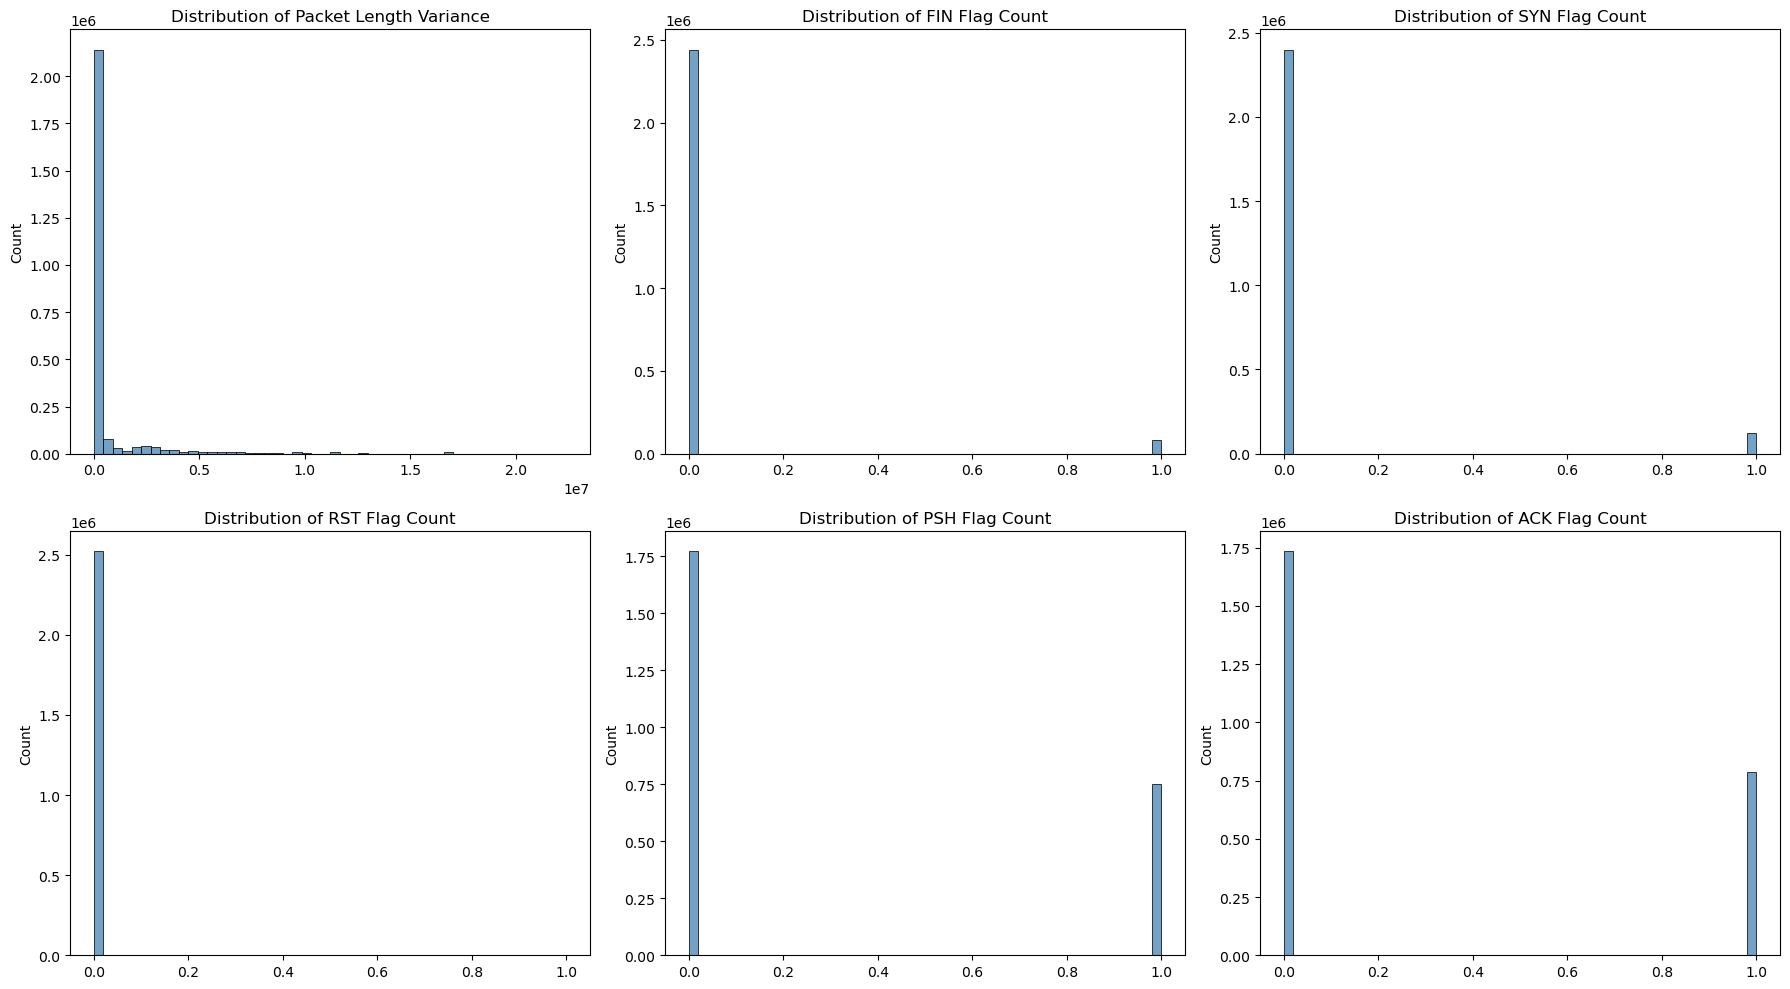

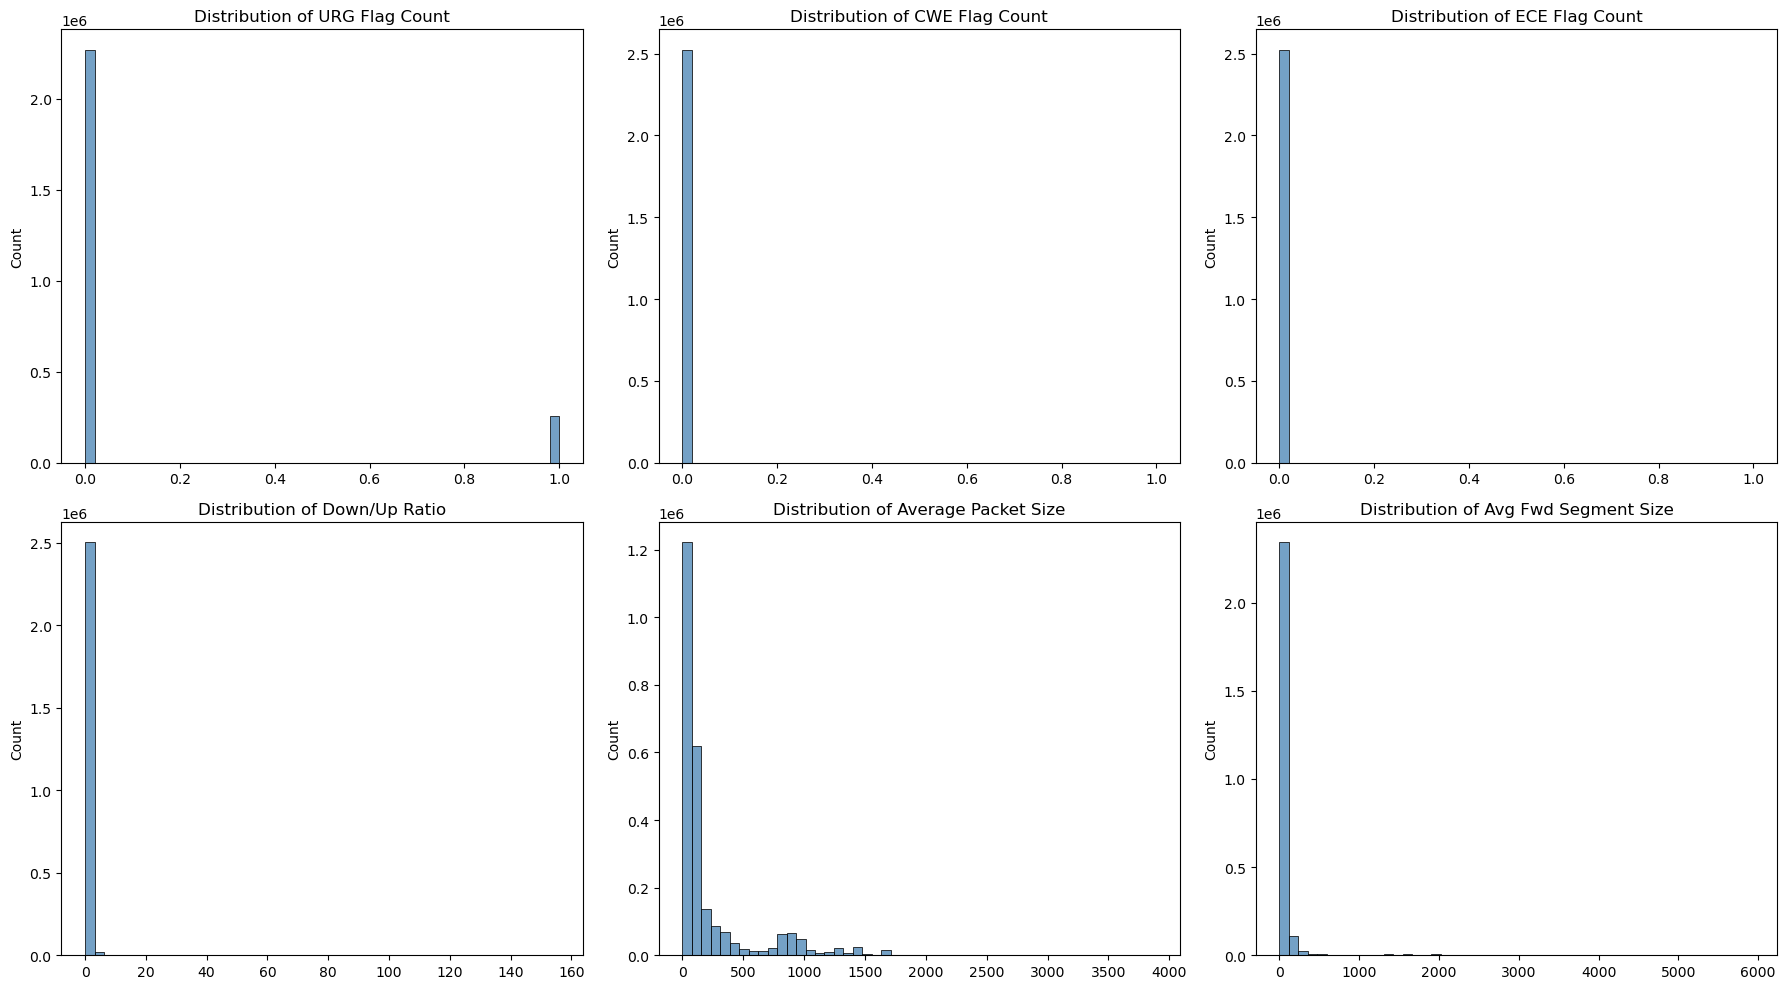

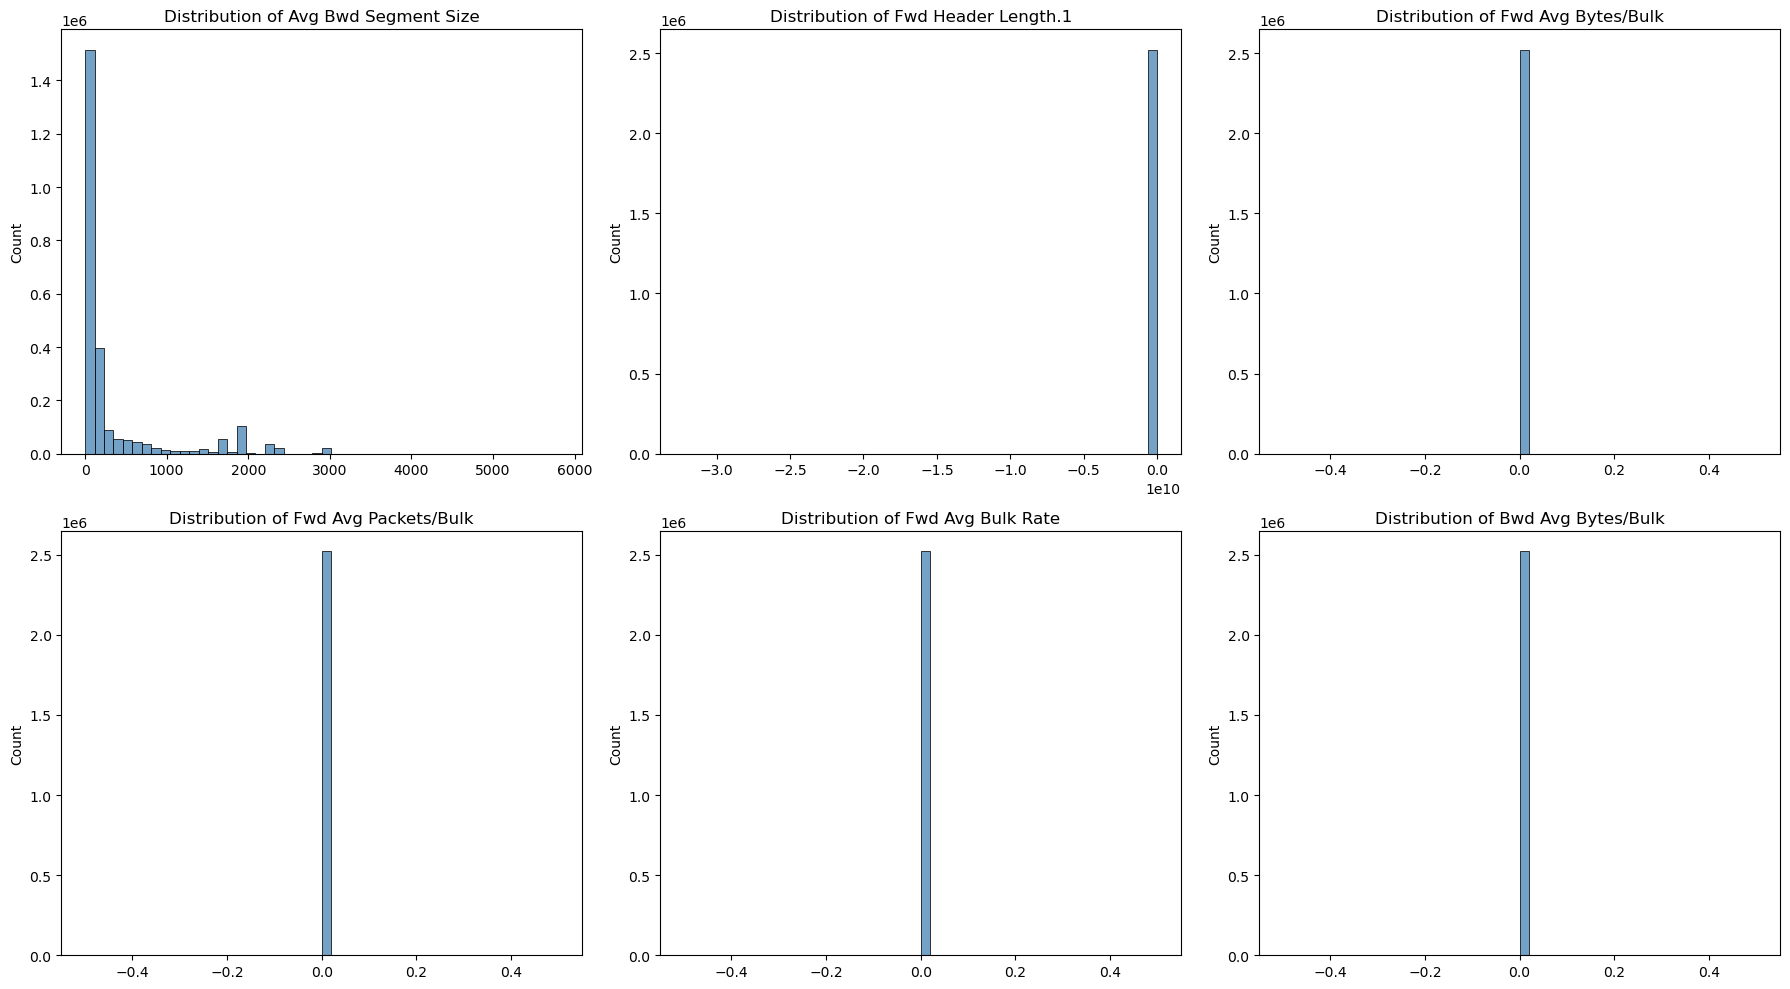

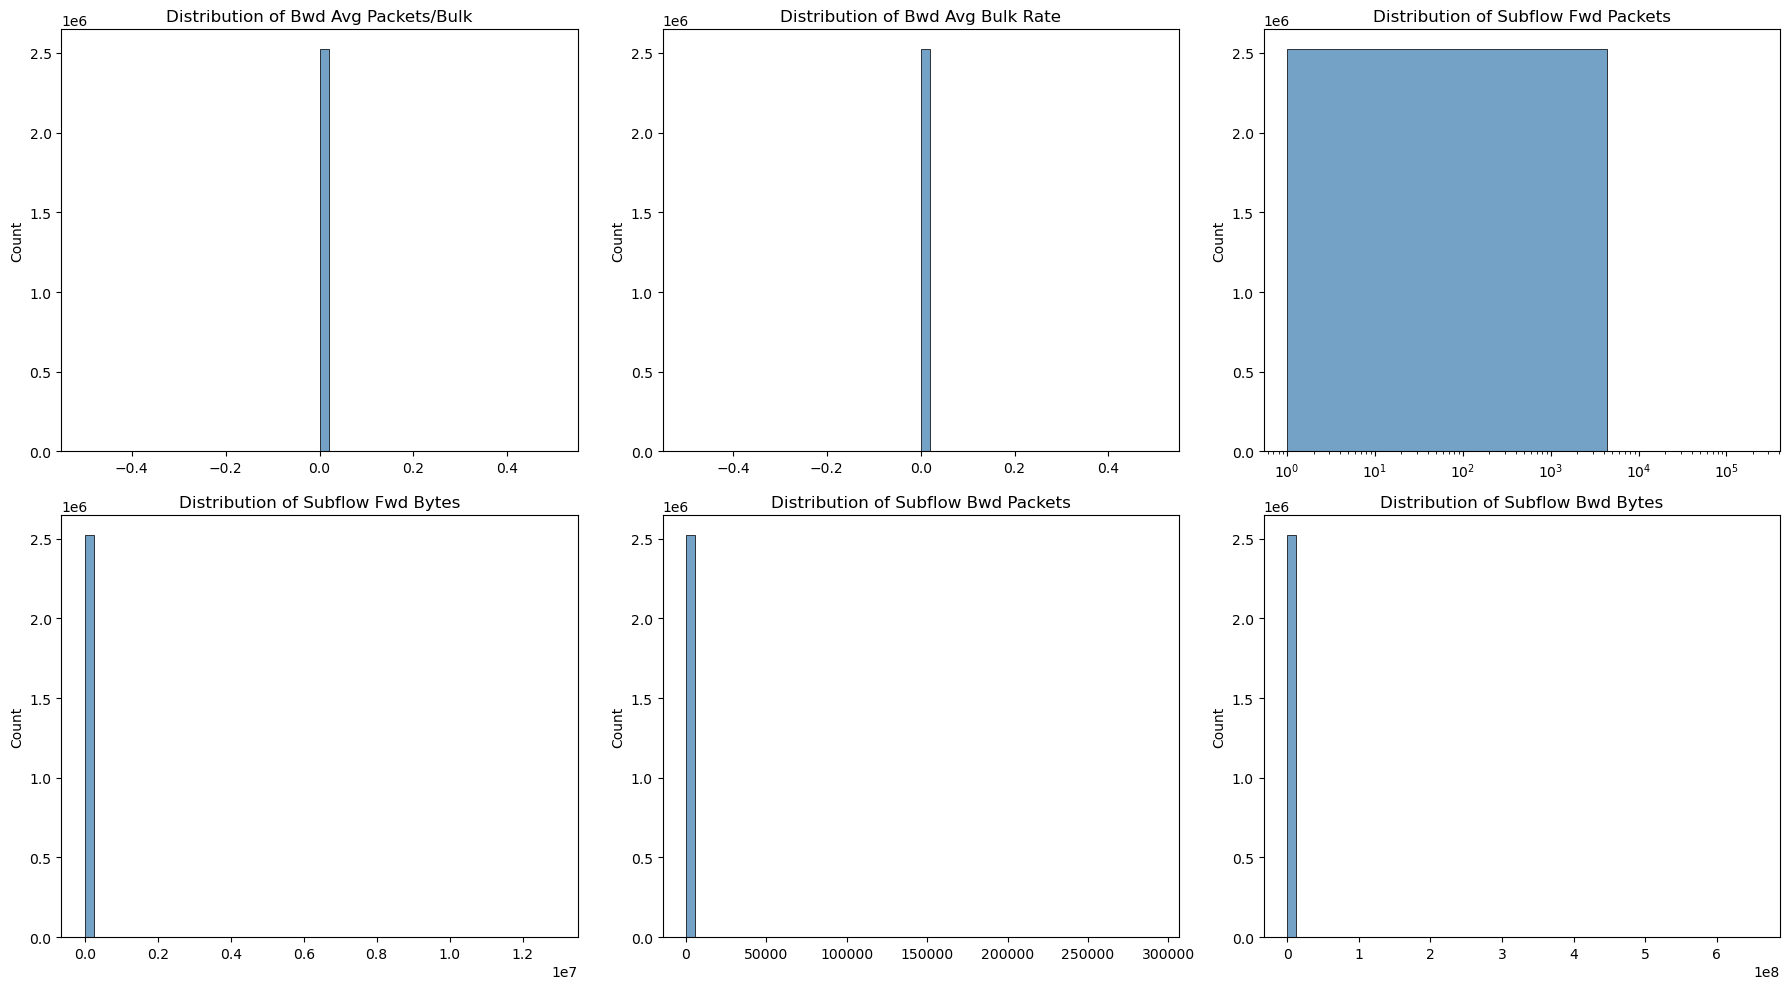

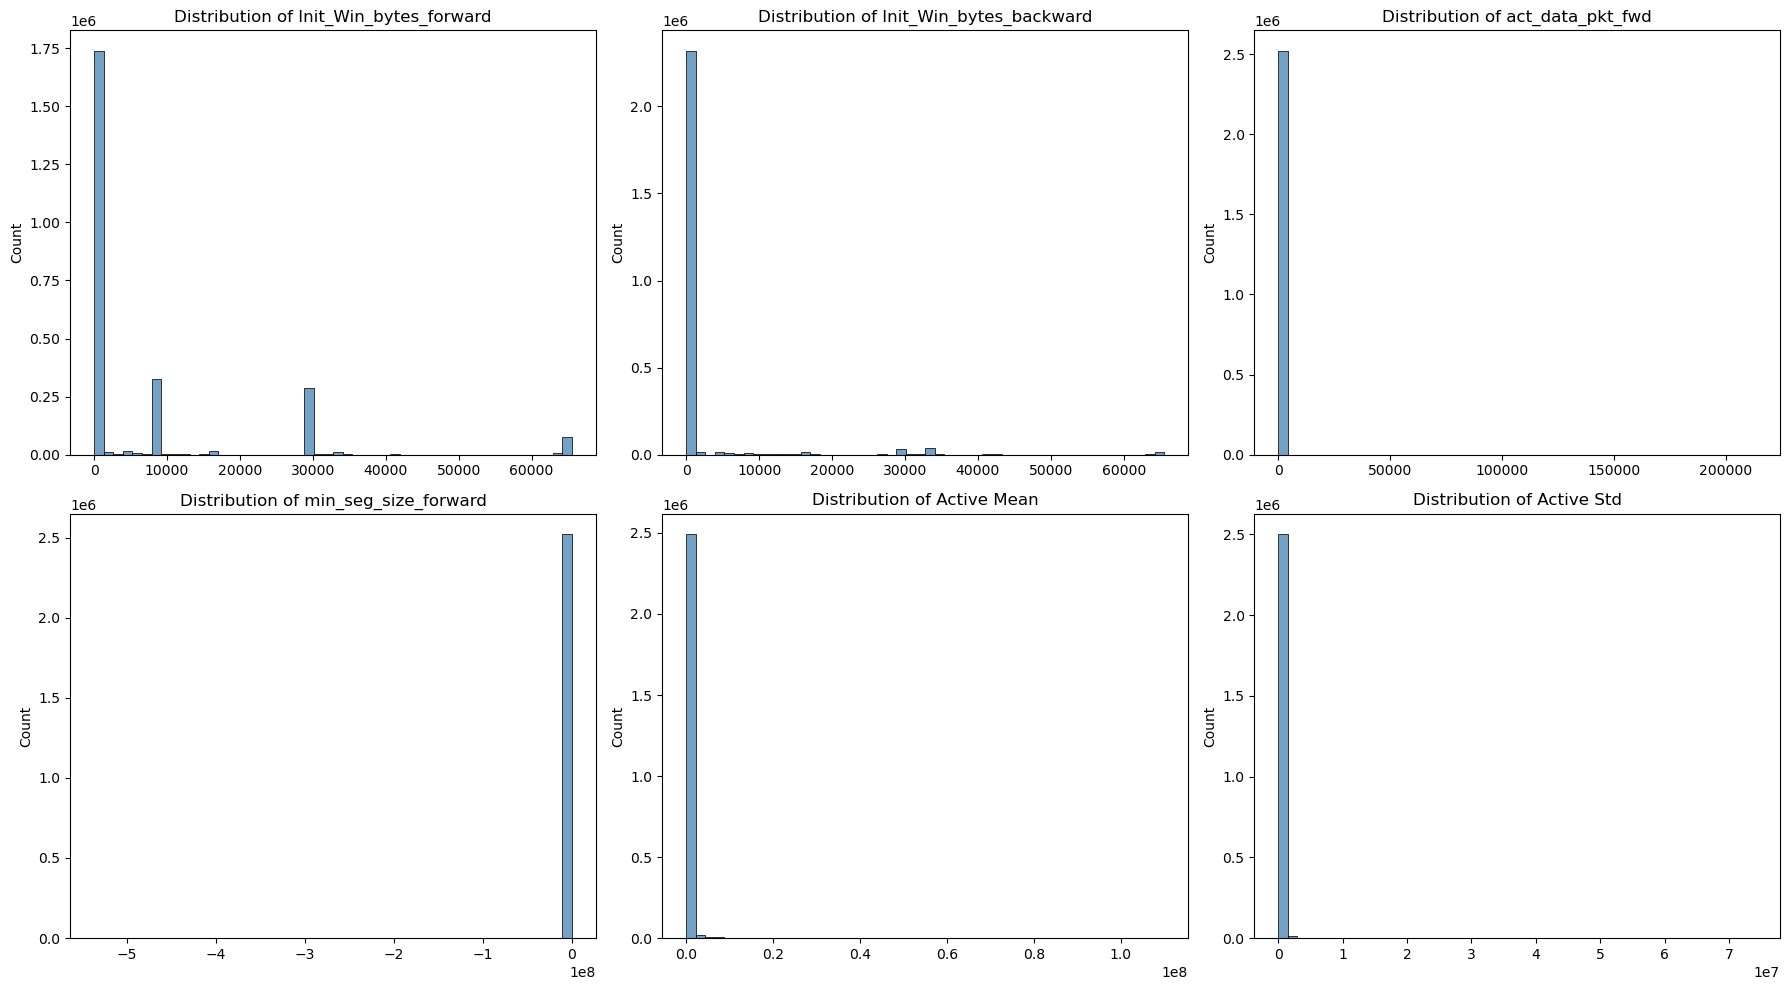

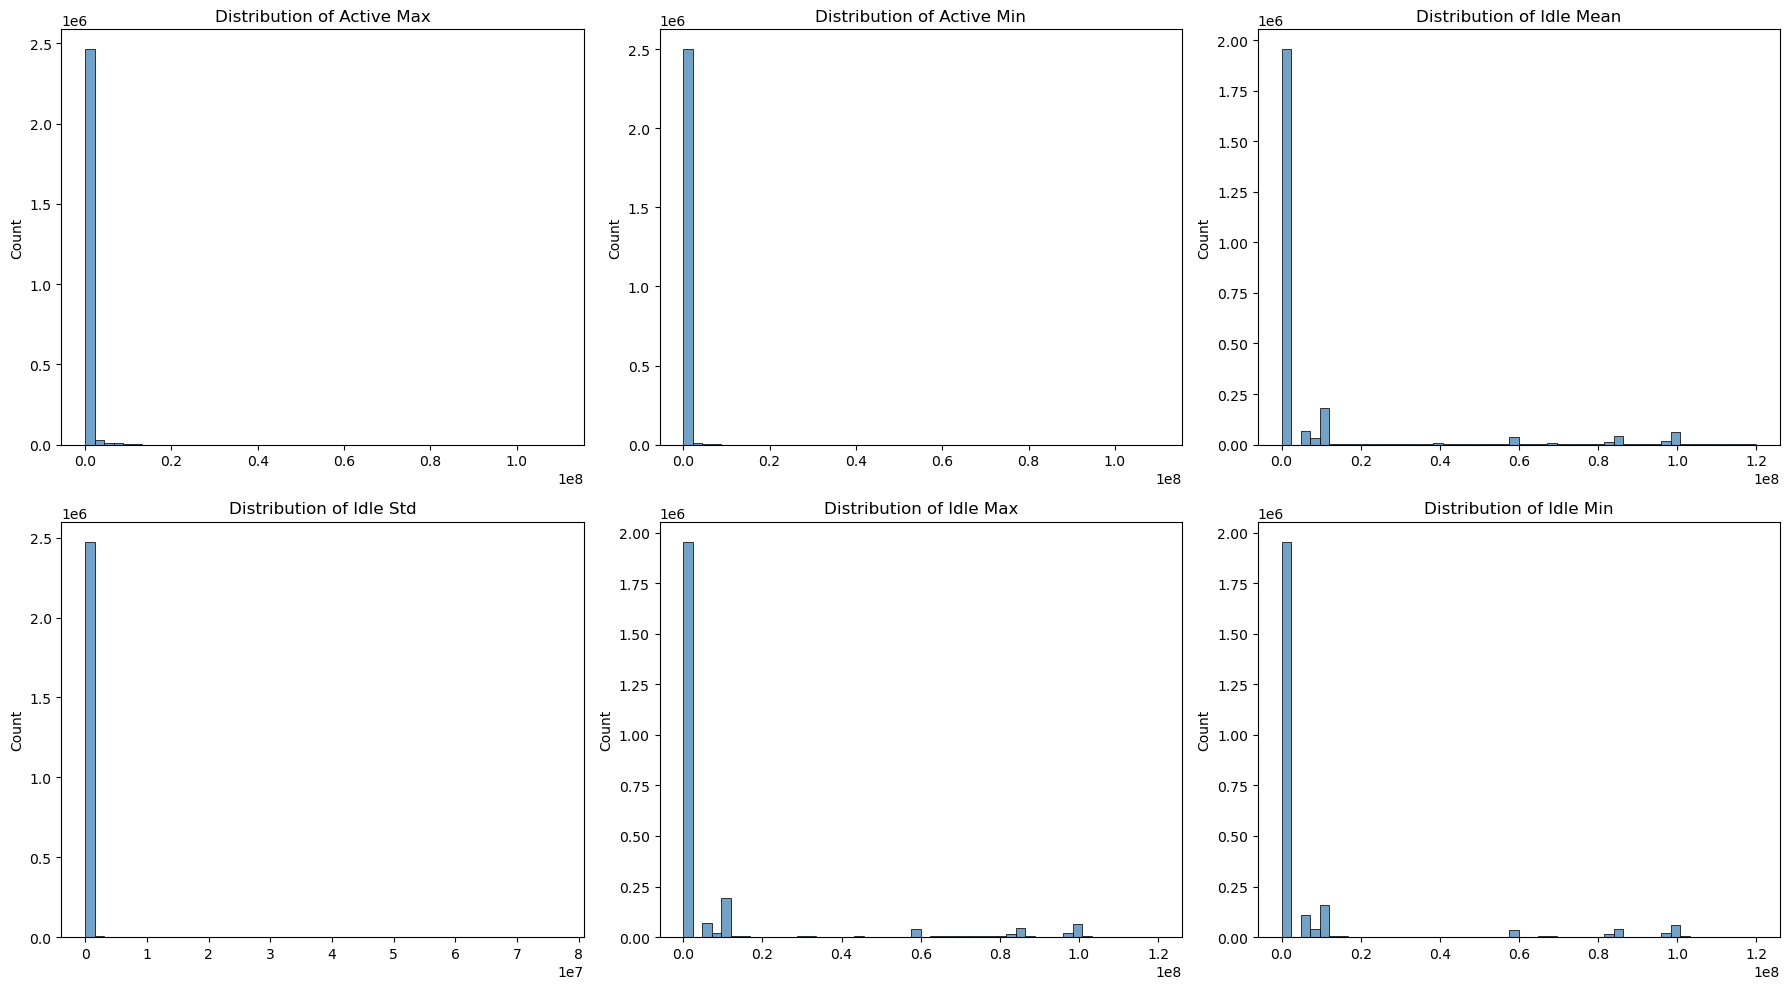

In [19]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# To avoid plotting hundreds of plots, let's visualize in batches of 6 per figure
batch_size = 6

for start in range(0, len(num_cols), batch_size):
    subset_cols = num_cols[start:start+batch_size]
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 cols per figure
    axes = axes.flatten()
    
    for i, col in enumerate(subset_cols):
        sns.histplot(data=df, x=col, bins=50, ax=axes[i], kde=False, color='steelblue')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        
        # For heavy-tailed features, try log scale on x-axis (skip zeros or negatives)
        if (df[col] > 0).all():
            axes[i].set_xscale('log')
    
    # Remove empty subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

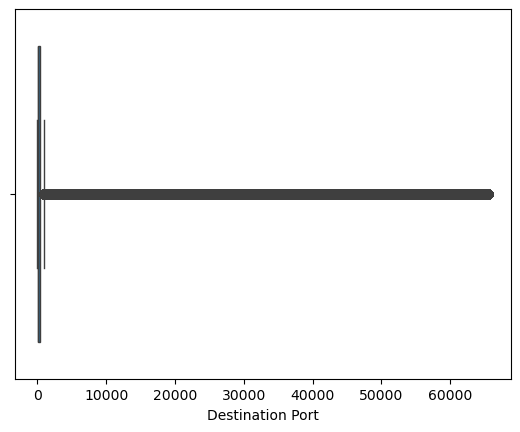

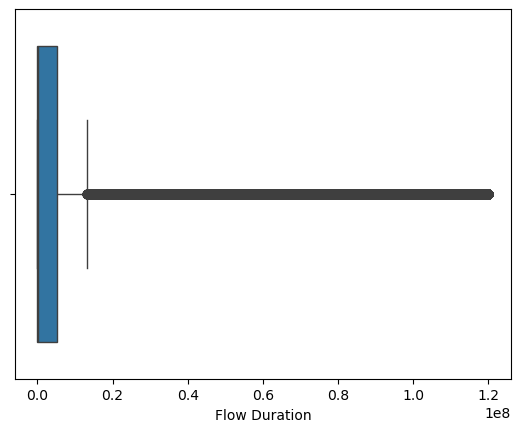

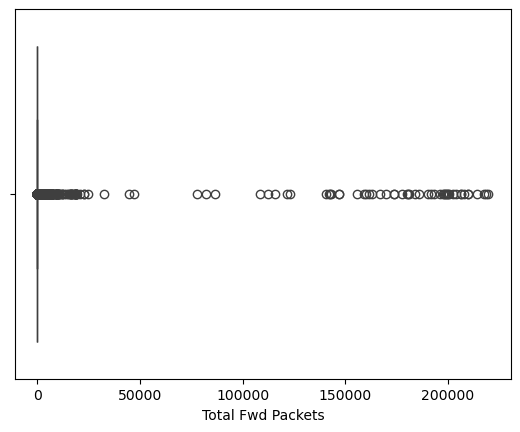

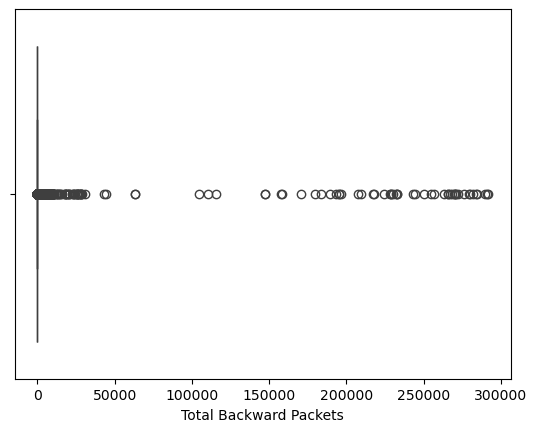

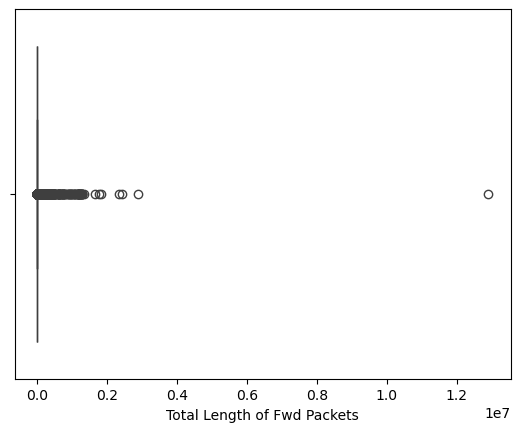

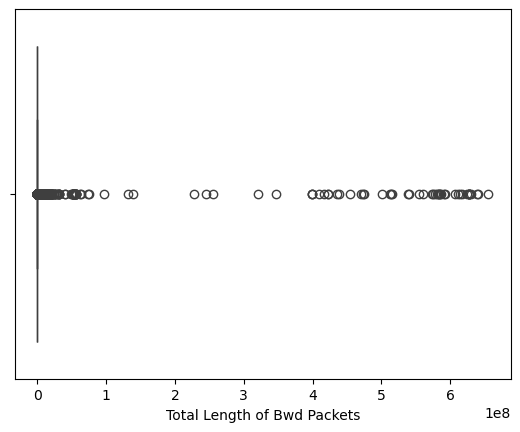

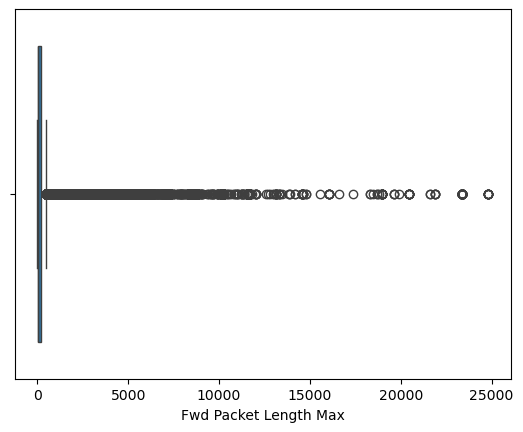

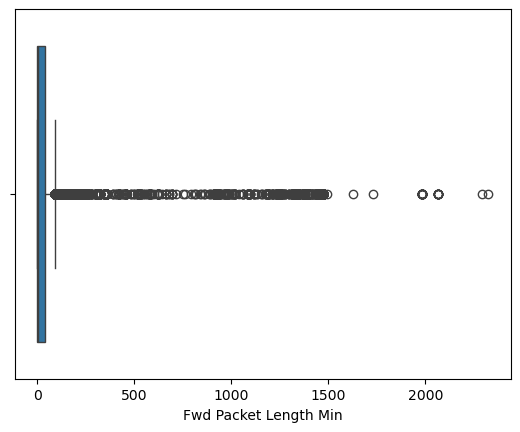

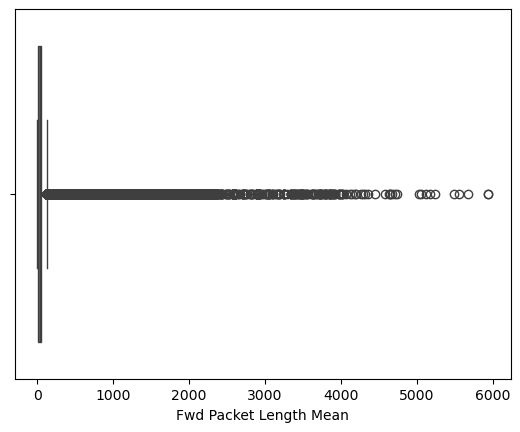

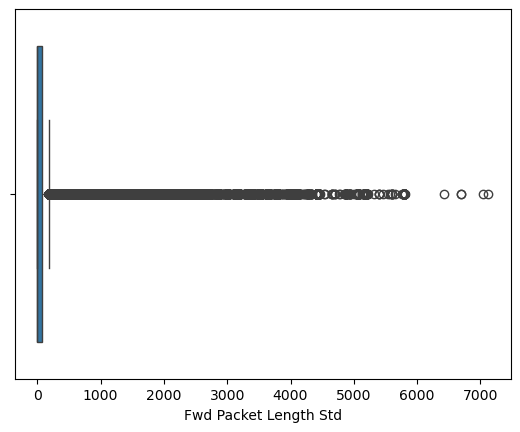

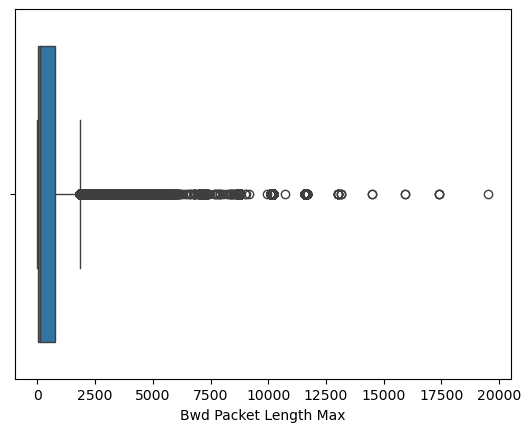

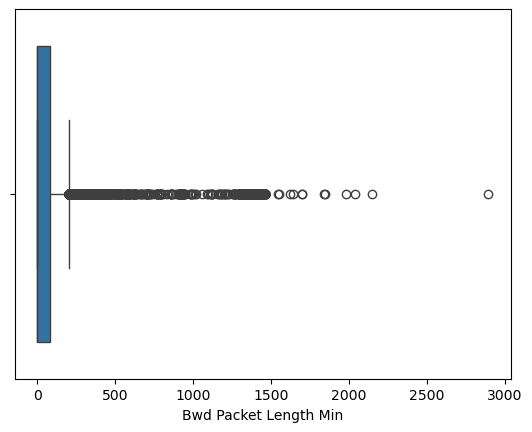

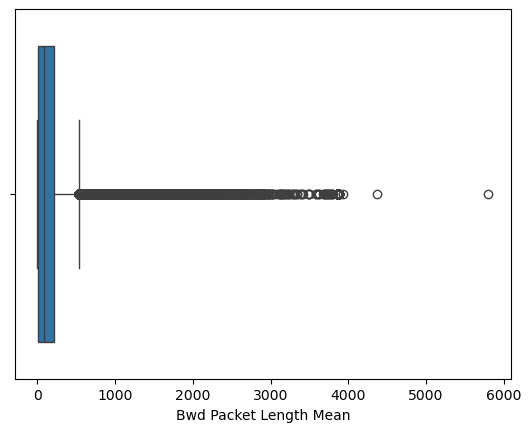

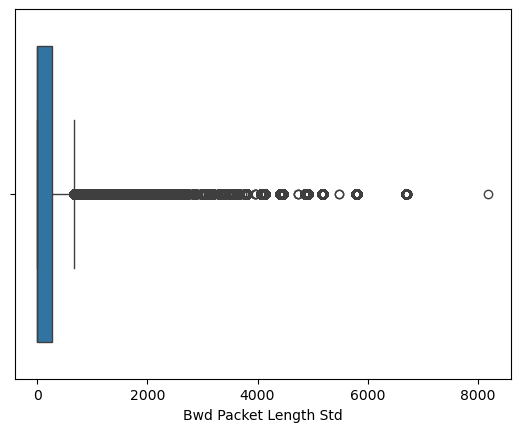

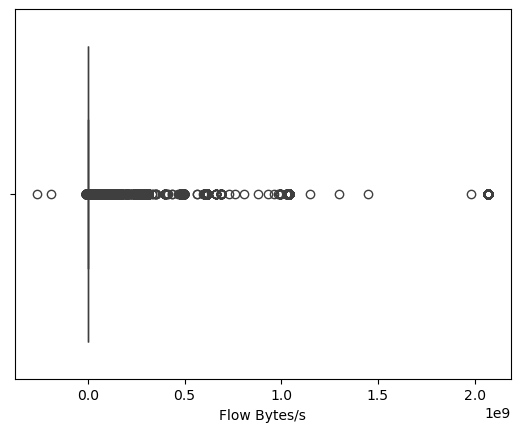

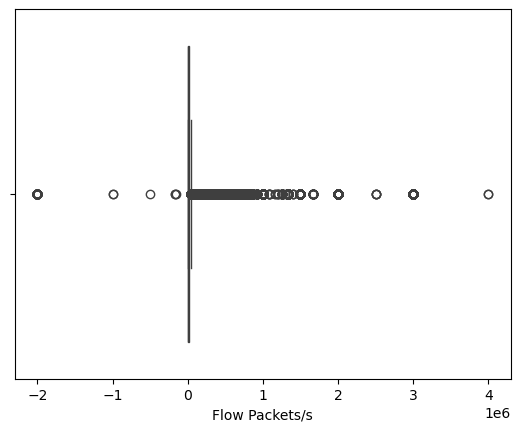

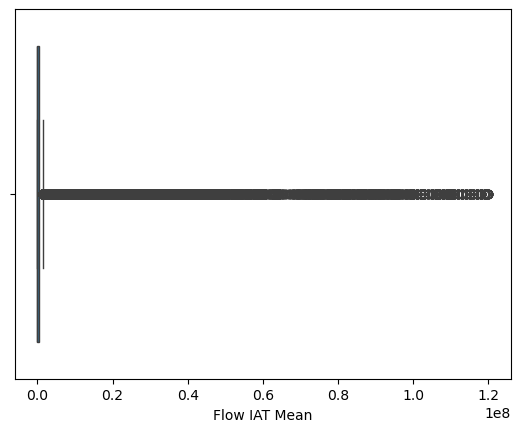

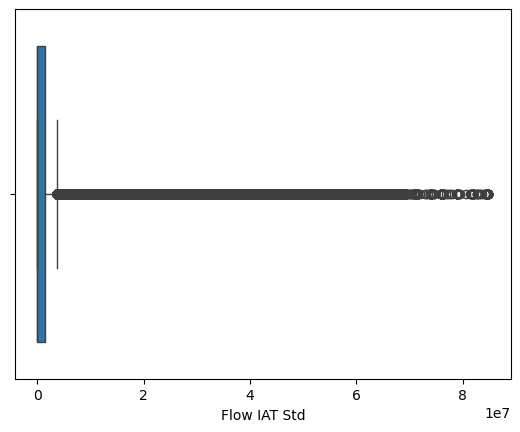

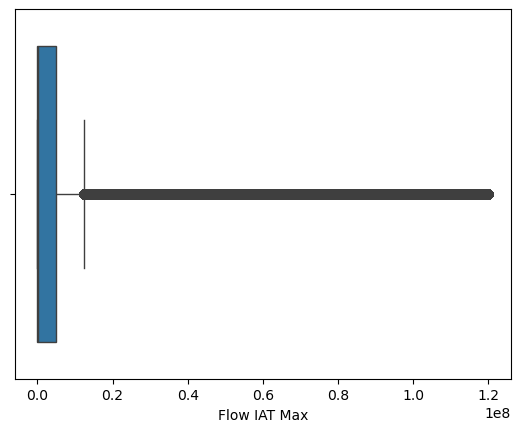

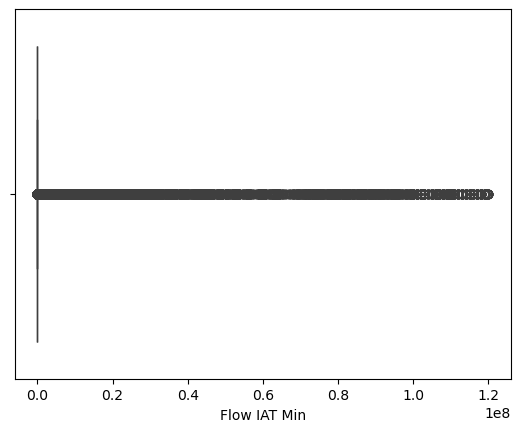

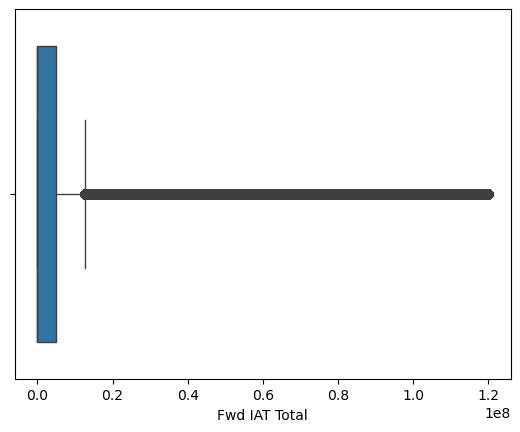

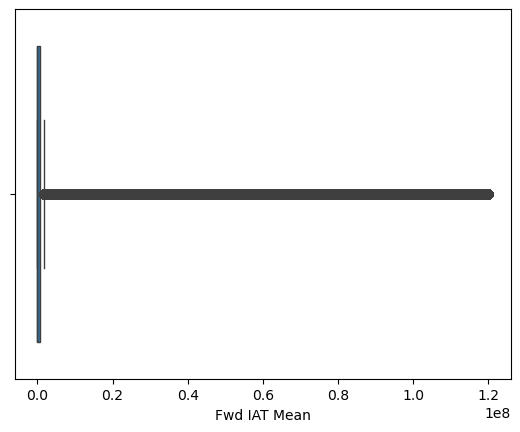

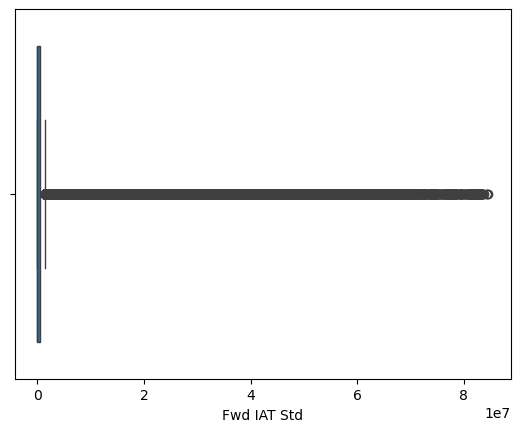

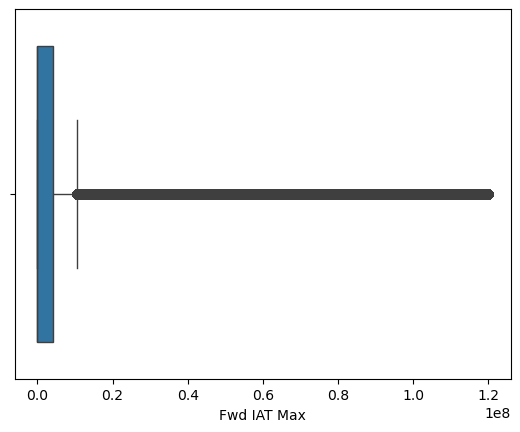

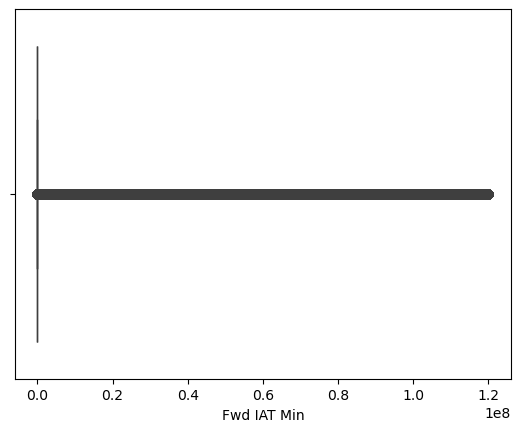

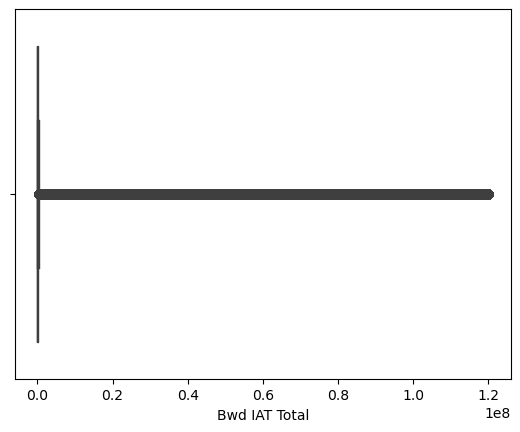

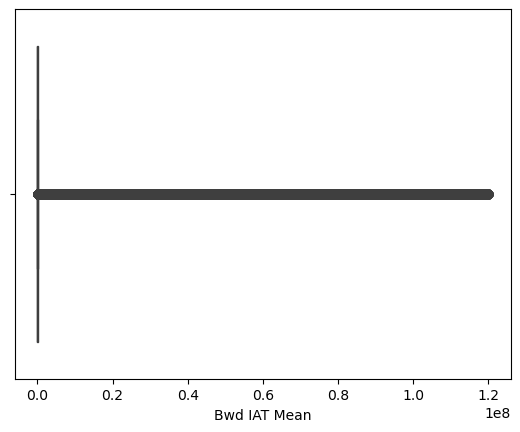

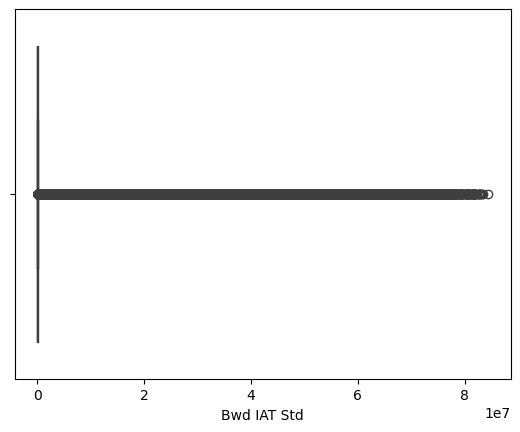

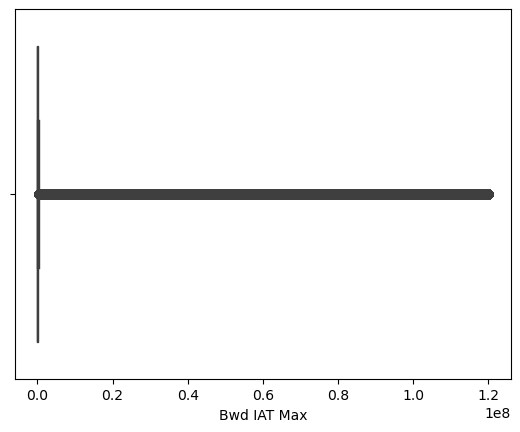

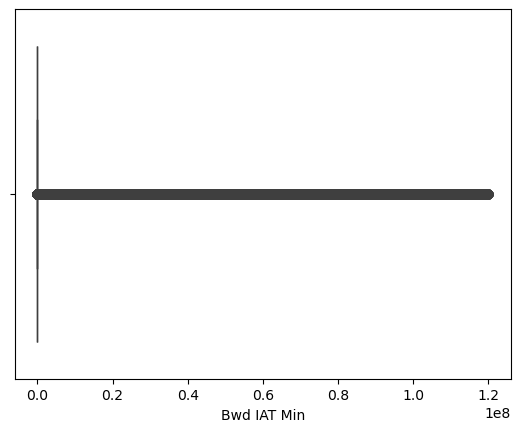

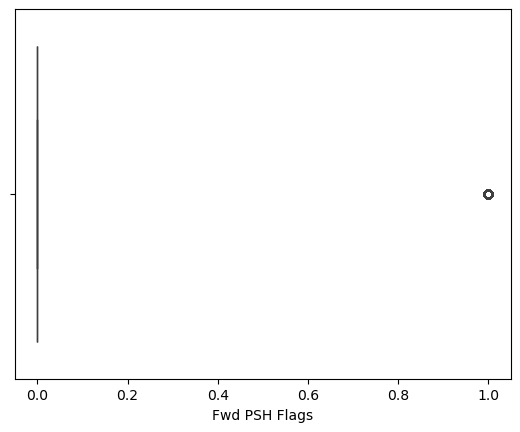

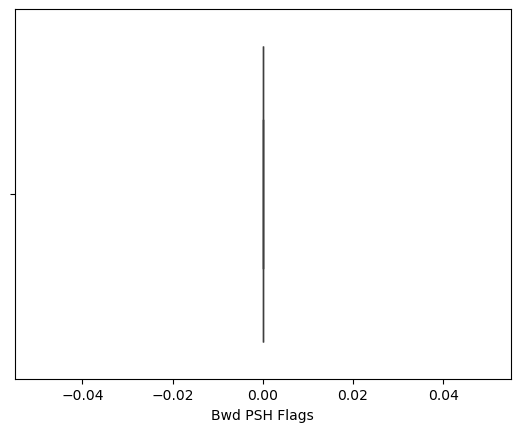

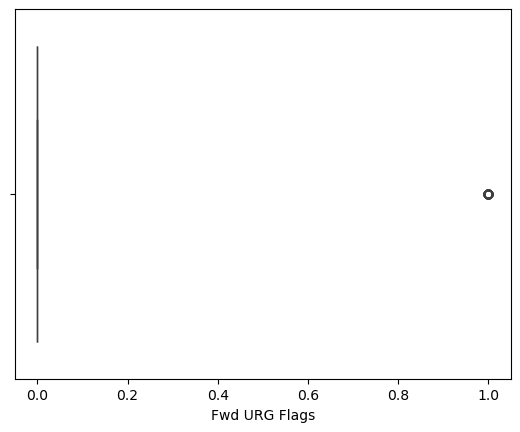

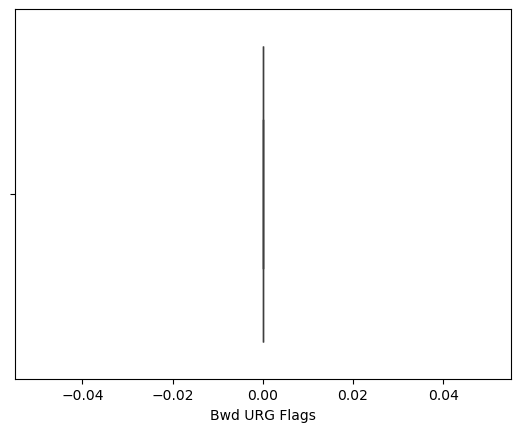

In [ ]:
#boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [ ]:

# Sample only a fraction for faster plotting (optional)
sample_df = df.sample(n=10000, random_state=42)  # adjust n if needed

# Plot boxplots for all numerical columns
for col in sample_df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 1.5))  # adjust height for better layout
    sns.boxplot(x=sample_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
#scatter plot to understand the relationship
df.select_dtypes(include="number").columns
for i in ['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']:
            sns.scatterplot(data=df,x=i,y="Label")
            plt.show()

In [ ]:


# Sample for performance
sample_df = df.sample(n=5000, random_state=42)

# Optional: Encode label if needed
# df['Label_num'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Features you want to compare with Label
features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']

for i in features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=sample_df, x=i, y='Label', alpha=0.5)
    plt.title(f'Scatter plot of {i} vs Label')
    plt.tight_layout()
    plt.show()


In [ ]:
#correlation with heatmap to interpret the realtion and multicolliniarity

s=df.select_dtypes(include="number").corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


## step 5 missing value treatments

In [ ]:
#chose the method of inputin missing value
#like mean, media or mode or KNNIputer
df.isnull().sum()